In [1]:
import tushare as ts
import yfinance as yf
import baostock as bs

2023-10-04 21:24:50,057 - yfinance - ERROR - 600011: No timezone found, symbol may be delisted


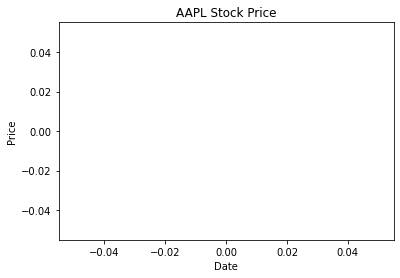

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'AAPL'
start_date = '2021-01-01'
end_date = '2021-12-31'

stock = yf.Ticker(symbol)
data = stock.history(start=start_date, end=end_date)

plt.plot(data['Close'])
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取沪深A股历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.600000",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2017-07-01', end_date='2017-12-31',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)




#### 结果集输出到csv文件 ####   
#result.to_csv("D:\\history_A_stock_k_data.csv", index=False)
print(result)

#### 登出系统 ####
bs.logout()

login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date       code     open     high      low    close preclose  \
0    2017-07-03  sh.600000  12.6400  12.6500  12.4700  12.5600  12.6500   
1    2017-07-04  sh.600000  12.5500  12.5800  12.4100  12.5500  12.5600   
2    2017-07-05  sh.600000  12.5000  12.6500  12.4700  12.6200  12.5500   
3    2017-07-06  sh.600000  12.6200  12.7200  12.5100  12.6600  12.6200   
4    2017-07-07  sh.600000  12.6200  12.6900  12.5500  12.6000  12.6600   
..          ...        ...      ...      ...      ...      ...      ...   
120  2017-12-25  sh.600000  12.6100  12.6800  12.5600  12.5900  12.6200   
121  2017-12-26  sh.600000  12.5700  12.6600  12.5600  12.6400  12.5900   
122  2017-12-27  sh.600000  12.6500  12.6600  12.5300  12.6200  12.6400   
123  2017-12-28  sh.600000  12.6000  12.6600  12.5300  12.5400  12.6200   


In [6]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

#### 获取数据 ####
rs = bs.query_history_k_data_plus("sh.000001",
    "date,code,open,high,low,close,preclose,volume,amount,pctChg",
    start_date='2023-01-01', end_date='2023-09-28', frequency="d")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

# 打印结果集
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)
# 结果集输出到csv文件
result.to_csv("sh.000001.csv", index=False)
print(result)

# 登出系统
bs.logout()


login success!
login respond error_code:0
login respond  error_msg:success
query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success
           date       code       open       high        low      close  \
0    2023-01-03  sh.000001  3087.5130  3119.8556  3073.0540  3116.5119   
1    2023-01-04  sh.000001  3117.5711  3129.0937  3109.4512  3123.5164   
2    2023-01-05  sh.000001  3132.7614  3159.4270  3130.2300  3155.2162   
3    2023-01-06  sh.000001  3155.0747  3170.7418  3151.8407  3157.6365   
4    2023-01-09  sh.000001  3169.3737  3183.5830  3165.4282  3176.0845   
..          ...        ...        ...        ...        ...        ...   
177  2023-09-22  sh.000001  3084.7567  3132.5578  3078.8007  3132.4316   
178  2023-09-25  sh.000001  3131.2079  3131.2079  3112.1505  3115.6071   
179  2023-09-26  sh.000001  3114.0214  3120.2889  3102.2726  3102.2726   
180  2023-09-27  sh.000001  3104.0395  3125.4470  3103.8441  3107.3156   
181  2023-0

login success!
logout success!


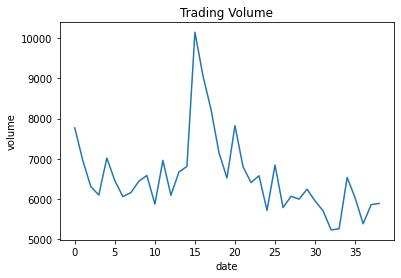

In [74]:
import baostock as bs
import pandas as pd
import datetime

def turnover(code_list):
    dfs = {}  
    #### 登陆系统 ####
    lg = bs.login()
    
    for code in code_list:
        rs = bs.query_history_k_data_plus(str(code),
                                          "date,code,volume,amount,pctChg",
                                          start_date = (datetime.date.today()- datetime.timedelta(days=60)).strftime("%Y-%m-%d"), 
                                          end_date = datetime.date.today().strftime("%Y-%m-%d"), 
                                          frequency="d")
        data_list = []
        while (rs.error_code == '0') & rs.next():
            data_list.append(rs.get_row_data())
        result = pd.DataFrame(data_list, columns=rs.fields)
        dfs[f'df_{code}'] = result
        
    df = pd.merge(list(dfs.items())[0][1], list(dfs.items())[1][1], on='date')
    df['volume'] = df['volume_x'].astype(float)  + df['volume_y'].astype(float) 
    df['amount'] = df['amount_x'].astype(float)  + df['amount_y'].astype(float) 
    df['pctChg'] = df['pctChg_x'].astype(float)  + df['pctChg_y'].astype(float)
    df['volume'] = df['volume']/10000000
    df = df[["date","volume","amount","pctChg"]]
    #df = df.set_index('date')
    #print(df)
    
    bs.logout()
    
    return df
    
code_list = ["sh.000001","sz.399106"]
df = turnover(code_list)

plt.plot(df['volume'])
plt.title('Trading Volume')
plt.xlabel('date')
plt.ylabel('volume')
plt.savefig(f"两市成交量_{datetime.date.today()}.png")
#plt.show()
